
### **1. GRE Score**
📌 **What is it for?** It represents the student's **Graduate Record Examination (GRE)** score. Typically, **a higher GRE score increases the chances of admission**.

### **2. TOEFL Score**
📌 **What is it for?** It is the student's **Test of English as a Foreign Language (TOEFL)** score. **A crucial factor for international students**, and a higher score **can improve admission chances**.

### **3. University Rating**
📌 **What is it for?** It indicates the **prestige level of the university** being applied to. Usually, it is rated **on a scale from 1 to 5**. **Higher-rated universities may have stricter admission standards**.

### **4. SOP (Statement of Purpose)**
📌 **What is it for?** It is a written statement where the student **explains why they chose this university and their academic goals**. **It can have a significant impact on the evaluation process**.

### **5. LOR (Letter of Recommendation)**
📌 **What is it for?** It reflects the **quality of academic or professional recommendations**. **Strong recommendations can enhance admission chances**.

### **6. CGPA (Cumulative Grade Point Average)**
📌 **What is it for?** It represents the student's **overall academic performance during their undergraduate studies**. **A high CGPA directly influences admission prospects**.

### **7. Research Experience**
📌 **What is it for?** It indicates whether the student **has prior research experience**. **It is typically expressed as 0 (no) and 1 (yes)**. **Students with research experience may have an advantage in admissions**.

### **8. Chance of Admit**
📌 **What is it for?** It is the **probability of admission** calculated by a model. **It generally ranges between 0 and 1**, meaning **higher values indicate greater chances of acceptance**.



In [33]:
import numpy as np
import pandas as pd
from rich.jupyter import display
from IPython.display import display


data = pd.read_csv('Admission_Predict.csv')

In [34]:
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [35]:
print(data.describe())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.34000

In [36]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


None

In [37]:
duplicated_values = data[data.duplicated()]
display(duplicated_values)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [38]:
data.drop(columns=['Serial No.'], inplace=True) 
# Column that will not contribute to the model.

In [39]:
data.columns = ['GRE', 'TOEFL', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE                400 non-null    int64  
 1   TOEFL              400 non-null    int64  
 2   University_Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance_of_Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


## 📊 Let's Start to Plot Our Features. 

In [41]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy.stats import gaussian_kde

In [42]:
fig = px.histogram(data, x='GRE', nbins=40, title='Distribution of GRE Scores')
fig.update_layout(bargap=0.2,template='plotly_dark', yaxis_title='Number of Students')
fig.show(renderer='iframe')

In [43]:
fig = px.histogram(data, x='CGPA', nbins=20, marginal="violin", histnorm='probability density', title='CGPA Distribution')

x = data['CGPA']

kde = gaussian_kde(x)

x_range = np.linspace(x.min(), x.max(), 100)

kde_values = kde(x_range)

# Add KDE to the same figure
fig.add_trace(go.Scatter(x=x_range, y=kde_values, mode='lines', name='KDE'))


fig.update_layout(bargap=0.2 ,template='plotly_dark', yaxis_title='Number of Students')
fig.show(renderer='iframe')

📌 A little left skewed graph. Most of the applicant scoring >= 8.5

In [44]:
University_Rating_Matrix = data['University_Rating'].value_counts().sort_index().reset_index()
display(University_Rating_Matrix)

,University_Rating,count
0,1,26
1,2,107
2,3,133
3,4,74
4,5,60


In [45]:
fig = px.bar(University_Rating_Matrix,y='count', x='University_Rating', title='University Rating Distribution')
fig.update_layout(template='plotly_dark',yaxis_title='Number of applicants')
fig.show(renderer='iframe')

In [46]:
fig = px.scatter(data, x='GRE', y='Chance_of_Admit', color = 'University_Rating', trendline='ols', 
                 title= 'GRE vs Chance of Admit (Colored by University Rating)')
fig.update_layout(template='plotly_dark')
fig.show(renderer = 'iframe')


In [47]:
fig = px.scatter(data, x='CGPA', y='Chance_of_Admit', color = 'Research', trendline='ols', 
                 title= 'CGPA vs Chance of Admit (Colored by Research)')
fig.update_layout(template='plotly_dark')
fig.show(renderer = 'iframe')


In [48]:
fig = px.box(data, x="Research", y="Chance_of_Admit", title="Chance of Admit by Research Experience")
fig.update_layout(template='plotly_dark')
fig.show(renderer='iframe')

In [49]:
correlation = data.corr().round(2)

fig = go.Figure(data=go.Heatmap(
    z=correlation.values,
    x=correlation.columns,
    y=correlation.columns,
    colorscale='Cividis',
    text=correlation.values,
    texttemplate="%{text}"
))
fig.update_layout(title='Correlation Heatmap',template='plotly_dark')
fig.show(renderer='iframe')

In [50]:
fig = px.scatter(data, x='SOP', y='Chance_of_Admit', size='LOR', color='LOR',
                 title='SOP vs Chance of Admit (Bubble Size = LOR Strength)')
fig.update_layout(template='plotly_dark')
fig.show(renderer='iframe')

📌 When SOR and LOR get's higher Chance of Admit get's higher too. Tip for feature engineering.

### **Let's Predict the chances of Admission**

In [51]:
X = data.drop(columns=['Chance_of_Admit']) 
y = data['Chance_of_Admit'] 

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling.
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [54]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Bagging': BaggingRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Function to evaluate all regression models
def evaluate_models(X_train, X_test, y_train, y_test):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred)
        results.append((name, r2, rmse))
    
    # Sort by R² score (higher is better)
    results.sort(key=lambda x: x[1], reverse=True)
    return results
        


In [55]:
results = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)

# Print performance via all models

print("Model Performance: \n")
for name, r2, rmse in results:
    print(f"{name}: R² = {r2:.8f}, RMSE = {rmse:.4f}")

Model Performance: 

Linear Regression: R² = 0.82120826, RMSE = 0.0046
Ridge Regression: R² = 0.82091917, RMSE = 0.0046
Random Forest: R² = 0.80462175, RMSE = 0.0050
Gradient Boosting: R² = 0.79734937, RMSE = 0.0052
AdaBoost: R² = 0.77546152, RMSE = 0.0058
Bagging: R² = 0.77226336, RMSE = 0.0059
Support Vector Regressor: R² = 0.75978148, RMSE = 0.0062
K-Nearest Neighbors: R² = 0.75603290, RMSE = 0.0063
Decision Tree: R² = 0.60442792, RMSE = 0.0102
Lasso Regression: R² = -0.00083958, RMSE = 0.0258
ElasticNet: R² = -0.00083958, RMSE = 0.0258


### After compare models performance we will go back to LogisticRegression. From above we can clearly see that Linear is better. 

In [56]:
# We are adjust thresh hold 0.8 so that out Logistic Model can predict. 
threshold = 0.8
data['Chance_of_Admit_Binary'] = (data['Chance_of_Admit'] >= threshold).astype(int)

data.drop(['Chance_of_Admit'], axis=1, inplace=True)

X = data.drop(['Chance_of_Admit_Binary'], axis=1)
y = data['Chance_of_Admit_Binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling.
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

#
model = LogisticRegression(max_iter= 1000)
model.fit(X_train_scaled, y_train.values.ravel())
y_pred = model.predict(X_test_scaled)



In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Model Performance Evaluation 

accuracy = accuracy_score(y_test, y_pred)

classification_report = classification_report(y_test, y_pred)

confusion_matrix = confusion_matrix(y_test, y_pred)

print(f"===== Accuracy: =====\n{accuracy}\n")
print(f"===== Classification report: ======\n{classification_report}\n")
print(f"Confusion matrix: \n{confusion_matrix}")

===== Accuracy: =====
0.9625

===== Classification report: ======
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.93      0.97      0.95        29

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80


Confusion matrix: 
[[49  2]
 [ 1 28]]


In [58]:
count_of_target_variable = data['Chance_of_Admit_Binary'].value_counts()

imbalance_ratio_tvariable = count_of_target_variable.max() / count_of_target_variable.min()

print(f"Imbalance Ratio: {imbalance_ratio_tvariable}") # Is it imbalanced ? Yes.

Imbalance Ratio: 2.125


In [59]:
y_pred_probability = model.predict_proba(X_test_scaled)[:, 1] 

results_df = pd.DataFrame({
    "Real Value" : y_test, 
    "Predicted Probability" : y_pred_probability.round(4), 
    "Prediction: " : y_pred 
})

display(results_df.head(20))

,Real Value,Predicted Probability,Prediction:
209,0,0.0058,0
280,0,0.0503,0
33,1,0.9941,1
210,0,0.7011,1
93,0,0.0004,0
84,1,0.9920,1
329,0,0.0001,0
94,0,0.0001,0
266,0,0.0060,0
126,1,0.8839,1


In [60]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(loss = "log_loss",max_iter=1000,tol = 1e-4, random_state=42, verbose = 1) # tolerans = 1e^-4, verbose = 1 : epochları gösterme.
sgd_model.fit(X_train_scaled, y_train)

print(f"Last Bias Value: {sgd_model.intercept_}\n\n")
print(f"\n\nFirst Three Weights: \n{sgd_model.coef_[:3]}")

-- Epoch 1
Norm: 40.84, NNZs: 7, Bias: -35.963079, T: 320, Avg. loss: 2.993249
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 43.73, NNZs: 7, Bias: -20.532778, T: 640, Avg. loss: 2.276232
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 36.86, NNZs: 7, Bias: -22.294944, T: 960, Avg. loss: 1.683111
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 30.97, NNZs: 7, Bias: -27.559900, T: 1280, Avg. loss: 1.377582
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 25.22, NNZs: 7, Bias: -22.065119, T: 1600, Avg. loss: 1.450923
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 28.27, NNZs: 7, Bias: -12.800063, T: 1920, Avg. loss: 1.225572
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 19.77, NNZs: 7, Bias: -17.651917, T: 2240, Avg. loss: 1.216840
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 18.28, NNZs: 7, Bias: -18.211306, T: 2560, Avg. loss: 0.848212
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 13.63, NNZs: 7, Bias: -16.409676, T: 2880, Avg. loss: 0.903176
Tot

### **Feature Importence**


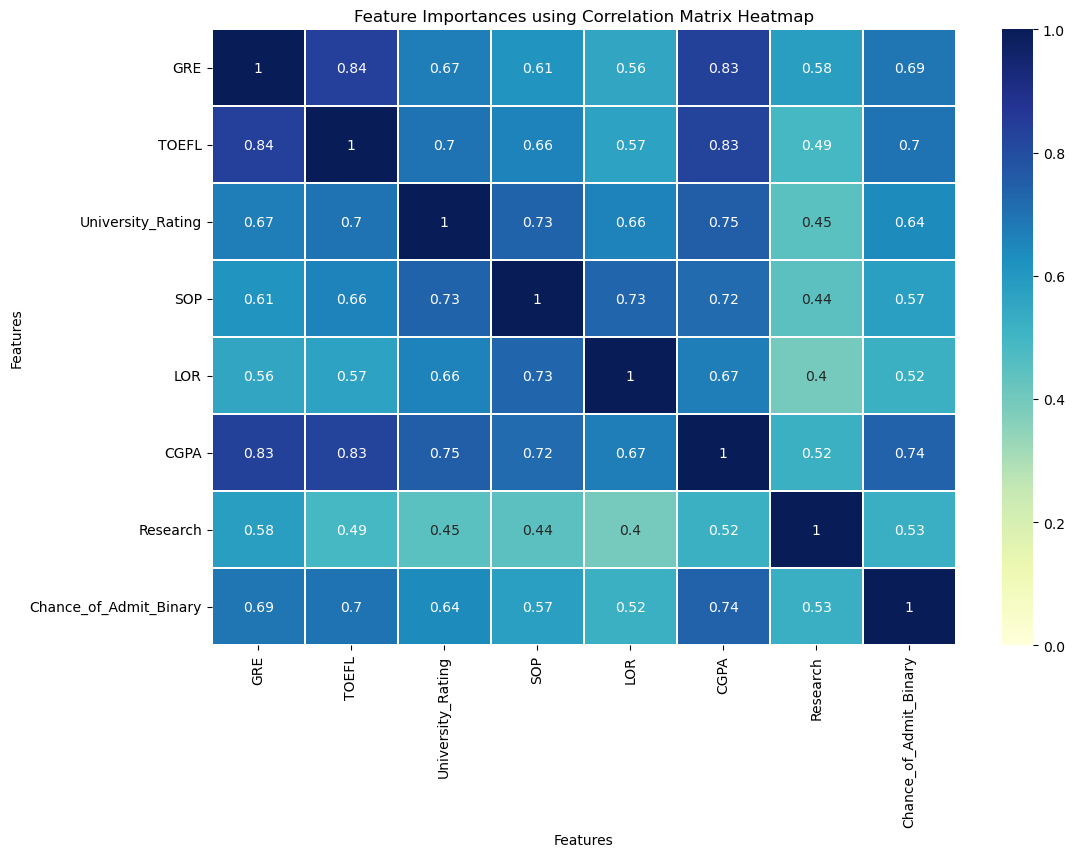

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = data.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.2, vmin=0, vmax=1)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Feature Importances using Correlation Matrix Heatmap')
plt.show()


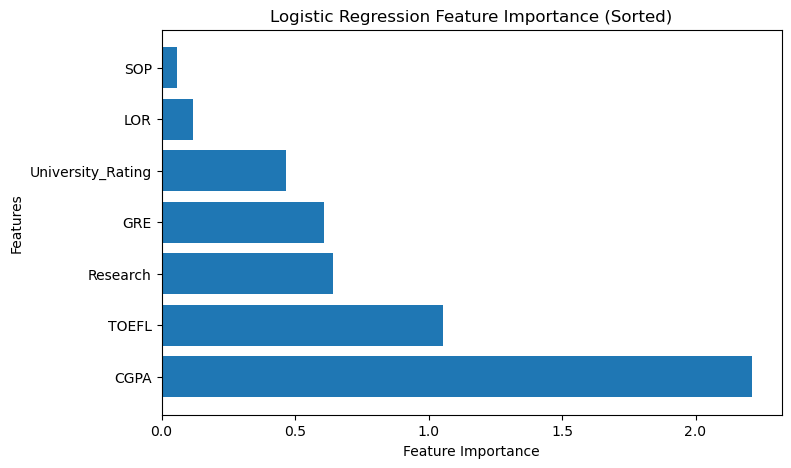

In [62]:
feature_importance = np.abs(model.coef_[0])
feature_names = X.columns


sorted_indices = np.argsort(feature_importance)[::-1]  
sorted_features = feature_names[sorted_indices]
sorted_importance = feature_importance[sorted_indices]


plt.figure(figsize=(8, 5))
plt.barh(sorted_features, sorted_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance (Sorted)")
plt.show()

# 🎯 **Threshold Adjustments & Model Performance**

## 🔍 **What Happens When Threshold = 0.7?**
- Lowering the threshold to **0.7** naturally **increases** the number of students classified as "admitted."
- More examples move into the **positive class**, meaning the model predicts **more admissions**.
- As a result, **false positives slightly increase**—the model is more **optimistic** in its predictions.
- Accuracy shows a **minor increase** (by ~0.05) compared to a **0.75 threshold**, so the impact isn’t drastic.

---

## 🔍 **What Happens When Threshold = 0.8?**
- The model becomes **more cautious** when predicting admissions.
- **False positives decrease**, meaning fewer students are incorrectly marked as admitted.
- **False negatives also decrease**, making the model more **reliable** overall.
- Accuracy **improves**, as the model makes **more confident predictions**.

---

# 🚀 **How Can We Improve the Model?**

### ✅ **Class Imbalance Check**
- Initially, the dataset seemed **balanced**, meaning no class had a **significant advantage**.
- If an imbalance were found earlier, **methods like SMOTE or resampling** could have been applied.

### 📈 **Exploring ROC Curve**
- To better understand the model, we’ll **visualize the ROC Curve**.
- This will show how well the model distinguishes between admitted and non-admitted students.

### 🔍 **Finding the Optimal Threshold**
- What's the **best admission threshold**?  
- Manually, **0.8** seems **optimal** as the ROC curve doesn’t fluctuate drastically.
- However, is there a **function to automate finding the best threshold?** 🤔 Let's explore!

---

## ⚠️ **Class Imbalance Detected!**
- A second imbalance check revealed that **Class 0 vs. Class 1 has nearly a 2x difference** in frequency.
- Solutions to balance the dataset:
  - **Use `class_weight='balanced'` in Logistic Regression** ✅
  - **Apply SMOTE (Synthetic Minority Over-sampling Technique)** ✨
  - **Try Under-Sampling methods** 🔄

---


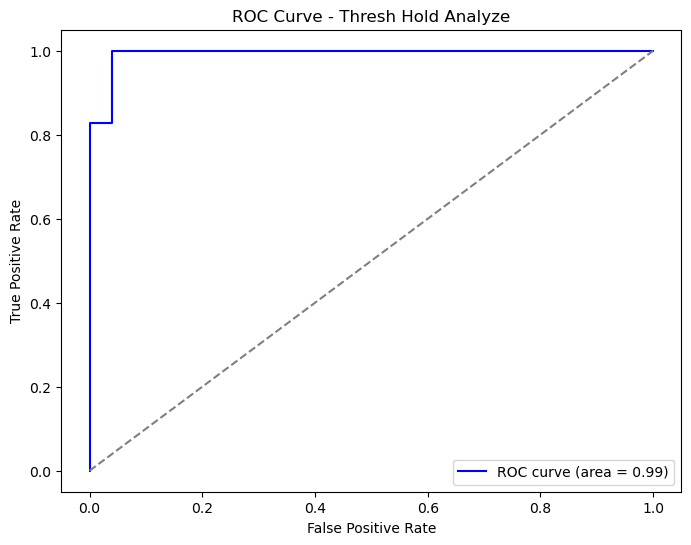

In [63]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability) 
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Thresh Hold Analyze")
plt.legend(loc="lower right")
plt.show()

Here’s an improved and translated version of your markdown with a more engaging tone:

---

# 📌 **AUC (Area Under the Curve) Score Analysis**  

## 🔍 **Understanding AUC**
- **AUC = 0.99**, meaning the model has **excellent discrimination ability** between classes.  
- A **perfect model** would have an AUC of **1.0**, while a completely random model would have an AUC of **0.5**.  
- A **0.99 score** indicates that the model is correctly distinguishing classes in almost all cases!  

---

## 📌 **Conclusion**  
✅ **The model is nearly perfect!**  
✅ It **keeps false positives very low** while making **accurate positive predictions**.  
✅ This suggests **high reliability** and strong classification performance.  

